# Area Finding Methods

## Trapezoidal Rule

In [42]:
from math import e, log10
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from scipy import integrate

In [3]:
def f(x):
    return e**-x

In [51]:
true_val = integrate.quad(f, 1, 5)[0]  # Using scipy to get the true value of the integral
error_val = integrate.quad(f, 1, 5)[1]
print(f"True value of the integral from 1 to 5: {true_val}")
print(f"Error in the true value of the integral from 1 to 5: {error_val}")

True value of the integral from 1 to 5: 0.3611414941723569
Error in the true value of the integral from 1 to 5: 4.009476019776825e-15


In [5]:
# Trapezoidal Rule
def trapezoidal_rule(f, a, b, n=1000):
    h = (b - a) / n
    y_vals = [f(a + i * h) for i in range(n + 1)]
    trapezoidal_sum = (sum(y_vals)*2 - y_vals[0] - y_vals[-1]) * h / 2.0
    return trapezoidal_sum

a, b = 1, 5
print(f"For n = 10 : {trapezoidal_rule(f,1,5,10)}; Error {abs(trapezoidal_rule(f,1,5,10) - true_val)}; Max Error {(b-a)*((b-a)**2)/(12*10**2) * (f(-1))}")
print(f"For n = 20 : {trapezoidal_rule(f,1,5,20)}; Error {abs(trapezoidal_rule(f,1,5,20) - true_val)}; Max Error {(b-a)*((b-a)**2)/(12*20**2) * (f(-1))}")
print(f"For n = 40 : {trapezoidal_rule(f,1,5,40)}; Error {abs(trapezoidal_rule(f,1,5,40) - true_val)}; Max Error {(b-a)*((b-a)**2)/(12*40**2) * (f(-1))}")
print(f"For n = 100 : {trapezoidal_rule(f,1,5,100)}; Error {abs(trapezoidal_rule(f,1,5,100) - true_val)}; Max Error {(b-a)*((b-a)**2)/(12*100**2) * (f(-1))}")


For n = 10 : 0.3659439222298367; Error 0.004802428059836661; Max Error 0.14497503085114907
For n = 20 : 0.36234449737983476; Error 0.001203003209834741; Max Error 0.03624375771278727
For n = 40 : 0.36144239527089916; Error 0.00030090110089914246; Max Error 0.009060939428196817
For n = 100 : 0.3611896450875702; Error 4.815091757015555e-05; Max Error 0.0014497503085114907


## $$\text{Simpson's} \frac{1}{3} \text{Rule}$$

In [45]:
# Simpson's 1/3 Rule
def simpsons_one_third_rule(f, a, b, n=1000):
    if n % 2 == 1:
        n += 1  # n must be even
    h = (b - a) / n
    y_vals = [f(a + i * h) for i in range(n + 1)]
    simpson_sum = (y_vals[0] + y_vals[-1] + 4 * sum(y_vals[i] for i in range(1, n, 2)) +
                   2 * sum(y_vals[i] for i in range(2, n - 1, 2))) * h / 3.0
    return simpson_sum

"""
print(f"For n = 10 : {simpsons_one_third_rule(f,1,5,10)}; Error {abs(simpsons_one_third_rule(f,1,5,10) - true_val)}; MaxError {-1*f(-1)*((b-a)**5)/(180*10**4)}")
print(f"For n = 20 : {simpsons_one_third_rule(f,1,5,20)}; Error {abs(simpsons_one_third_rule(f,1,5,20) - true_val)}; MaxError {-1*f(-1)*((b-a)**5)/(180*20**4)}")
print(f"For n = 40 : {simpsons_one_third_rule(f,1,5,40)}; Error {abs(simpsons_one_third_rule(f,1,5,40) - true_val)}; MaxError {-1*f(-1)*((b-a)**5)/(180*40**4)}")
print(f"For n = 100 : {simpsons_one_third_rule(f,1,5,100)}; Error {abs(simpsons_one_third_rule(f,1,5,100) - true_val)}; MaxError {-1*f(-1)*((b-a)**5)/(180*100**4)}")
"""

def simpsons_one_third_plot(a:int, b:int):
    results = []
    for n in range(1, 1000, 1):
        result = simpsons_one_third_rule(f, a, b, n)
        h = (b - a) / n
        error = log10(abs(result - true_val))
        results.append((log10(h), error))

    plt.figure(figsize=(10, 5))
    plt.plot(*zip(*results), marker='o')
    plt.title("Simpson's 1/3 Rule Error Convergence")
    plt.xlabel('log10(h)')
    plt.ylabel('log10(Error)')
    plt.grid(True)
    plt.show()

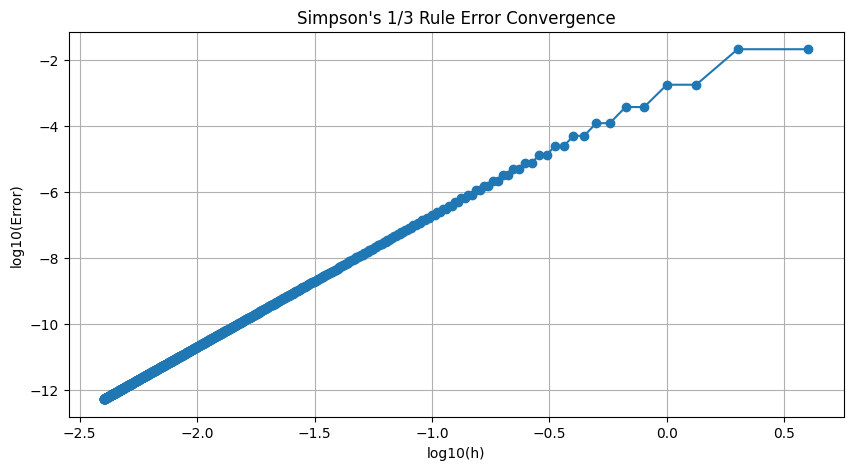

In [46]:
    simpsons_one_third_plot(1,5)

## Gausiian Legendre Quadrature

In [48]:
# Write a script to export roots of Legendre polynomials and weights for Gaussian quadrature of degree n
def gaussian_quadrature_weights_and_roots(n):
    roots, weights = roots_legendre(n)
    return roots, weights

In [60]:
def xi(t:float, a:float, b:float) :
    return (b - a) / 2 * t + (b + a) / 2

def weight(t:float, a:float, b:float) :
    return (b - a) / 2 * t

def gaussian_legendre_quadrature(f, lower_limit, upper_limit,n=5):
    ti, wi = gaussian_quadrature_weights_and_roots(n)  # Using 5-point Gaussian quadrature
    xi_vals = [xi(t, lower_limit, upper_limit) for t in ti]
    weights_adjusted = [weight(t, lower_limit, upper_limit) for t in wi]
    integral = sum(f(x) * w for x, w in zip(xi_vals, weights_adjusted))
    return integral

def gaussian_legendre_plot():
    results = []
    for n in range(0, 10, 1):
        result = gaussian_legendre_quadrature(f, 1, 5, n+1)  # Known value for the integral from 1 to 5
        if abs(result-true_val):
            error = log10(abs(result - true_val))
            results.append((n+1, error))

    plt.figure(figsize=(10, 5))
    plt.plot(*zip(*results), marker='o')
    plt.title("Gaussian Legendre Quadrature Error Convergence")
    plt.xlabel('n (Number of Points)')
    plt.ylabel('log10(Error)')
    plt.grid(True)
    plt.show()

Gaussian Legendre Quadrature: 0.36114149417235686; Error 5.551115123125783e-17


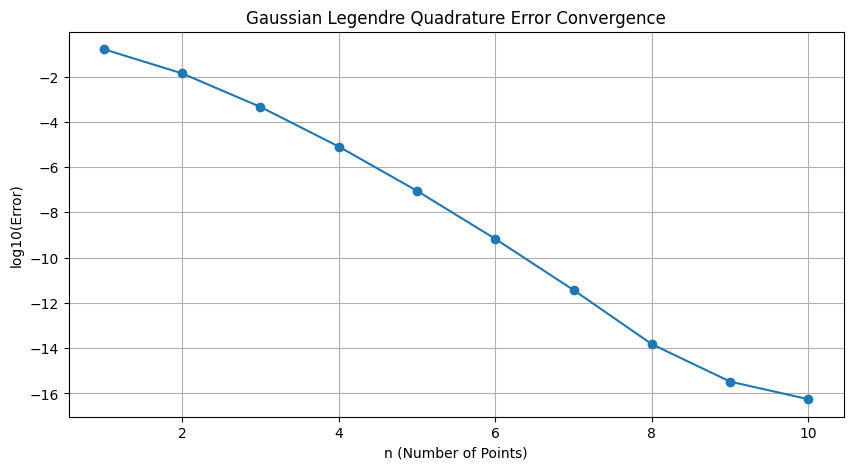

In [61]:
print(f"Gaussian Legendre Quadrature: {gaussian_legendre_quadrature(f, 1, 5, n =10)}; Error {abs(gaussian_legendre_quadrature(f, 1, 5, n= 10) - true_val)}")
gaussian_legendre_plot()